In [1]:
from dataset import MayoDataset
import tools

dataset = MayoDataset(base_dir="C:\\Users\\yuans\\Desktop\\Mayo_dataset\\DATASET_MAYO")

dataset.print_columns()
dataset.print_statistics()

Index(['index', 'anatomy', 'category_id', 'channel', 'electrode_type',
       'institution', 'patient_id', 'reviewer_id', 'segment_id', 'soz',
       'category_name'],
      dtype='object')
Segments DataFrame Statistics:
Total segments: 155182

Column-wise statistics:
- index: 155182 unique values
- anatomy: 37 unique values
- category_id: 4 unique values
  Unique values: [1 3 2 0]
- channel: 148 unique values
- electrode_type: 2 unique values
  Unique values: ['depth' 'strip']
- institution: 1 unique values
  Unique values: ['mayo']
- patient_id: 24 unique values
- reviewer_id: 3 unique values
  Unique values: [3 1 2]
- segment_id: 155182 unique values
- soz: 2 unique values
  Unique values: [1 0]
- category_name: 4 unique values
  Unique values: ['noise' 'physiology' 'pathology' 'powerline_60hz']


Loading CLIP on cpu...


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.



Loading segments from dataset...
  Category 'noise': 2 segments
✓ Total loaded: 2 segments

EXAMPLE BANK GENERATION
Input: 2 time series
Plot types: ['raw_timeseries', 'spectrogram', 'psd', 'power_density_matrix']
LLM descriptions: Yes
Embedder: clip

Step 1: Generating plots...
  [1/2] x130341
    Generating raw_timeseries...
      ✓ C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\plots\raw_timeseries_c196e2d6.png
    Generating spectrogram...
      ✓ C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\plots\spectrogram_bda7a206.png
    Generating psd...
      ✓ C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\plots\psd_6519234d.png
    Generating power_density_matrix...
      ✓ C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\plots\power_density_matrix_e5d24617.png
  [2/2] x019743
    Generating raw_timeseries...
      ✓ C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\pl

LLM descriptions:   0%|          | 0/8 [00:00<?, ?it/s]

Debug: LLM response:
```json
{"description": "The signal shows irregular amplitude bursts and baseline shifts between 0.5s and 2.5s, indicating muscle and movement artifacts characteristic of noise."}
```


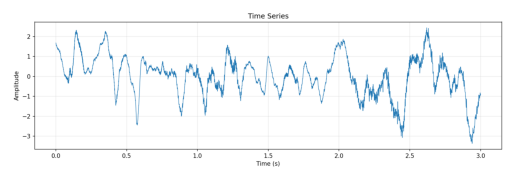

LLM descriptions:  12%|█▎        | 1/8 [00:02<00:16,  2.36s/it]

Debug: LLM response:
```json
{"description": "The spectrogram shows irregular, dense patches across 0-200 Hz, with fluctuating power levels indicating non-neural artifacts, aligning with noise criteria of amplitude anomalies."}
```


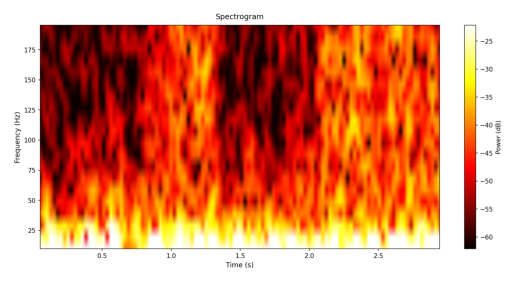

LLM descriptions:  25%|██▌       | 2/8 [00:05<00:16,  2.79s/it]

Debug: LLM response:
```json
{"description": "The PSD plot shows no sharp peaks at 60Hz or other frequencies, indicating absence of powerline interference; low power across frequencies suggests non-neural noise artifacts."}
```


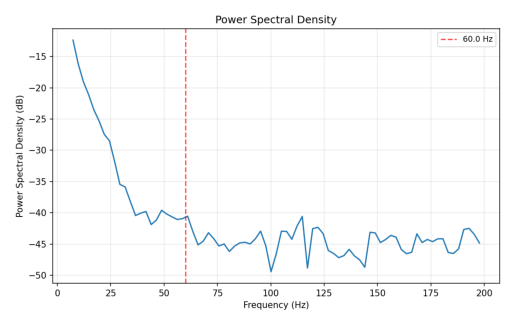

LLM descriptions:  38%|███▊      | 3/8 [00:08<00:14,  2.87s/it]

Debug: LLM response:
```json
{
  "description": "Irregular, dense patches and amplitude anomalies across 5-200 Hz indicate non-neural artifacts, consistent with noise due to muscle or movement artifacts rather than smooth physiological patterns."
}
```


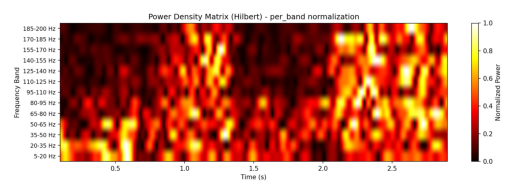

LLM descriptions:  50%|█████     | 4/8 [00:11<00:11,  2.89s/it]

Debug: LLM response:
```json
{"description": "The signal shows irregular dense patches and amplitude anomalies, particularly between 0.5-1.0s and 2.0-2.5s, indicating muscle artifacts characteristic of noise."}
```


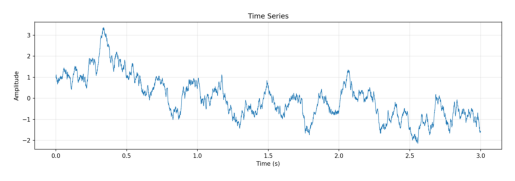

LLM descriptions:  62%|██████▎   | 5/8 [00:13<00:07,  2.62s/it]

Debug: LLM response:
```json
{"description": "The spectrogram shows irregular, dense patches with high power across 0-200 Hz, indicating non-neural artifacts typical of noise, such as muscle or movement artifacts."}
```


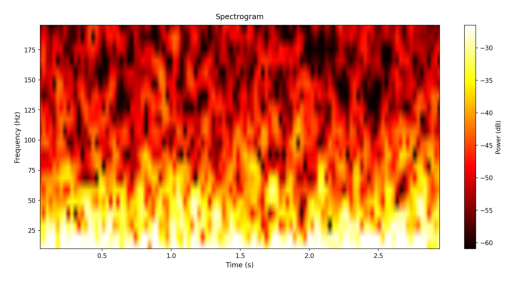

LLM descriptions:  75%|███████▌  | 6/8 [00:16<00:05,  2.68s/it]

Debug: LLM response:
```json
{"description": "The PSD plot shows irregular amplitude variations across frequencies without a sharp peak at 60Hz, indicating non-neural artifacts consistent with the 'noise' category."}
```


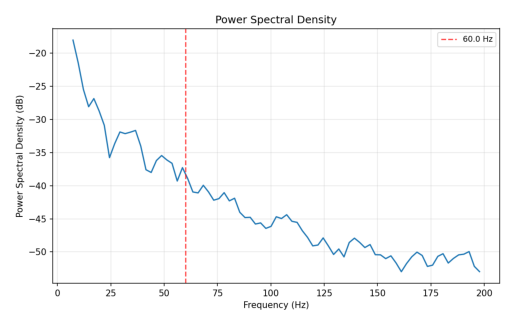

LLM descriptions:  88%|████████▊ | 7/8 [00:18<00:02,  2.48s/it]

Debug: LLM response:
```json
{
  "description": "The plot shows irregular, scattered high-power patches across all frequency bands and time intervals, indicating non-neural artifacts typical of noise, not structured neural activity."
}
```


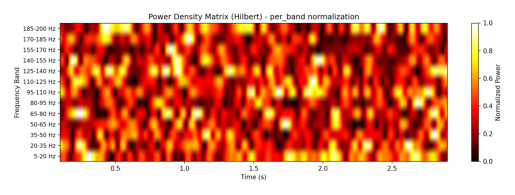

LLM descriptions: 100%|██████████| 8/8 [00:20<00:00,  2.57s/it]


✓ Generated descriptions

Step 3: Computing embeddings...


Computing embeddings: 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

✓ Computed embeddings

Step 4: Saving example bank...
✓ Saved to C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\example_bank.jsonl
✓ Saved config to C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\config.json

GENERATION COMPLETE
Total examples: 8
Output: C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\example_bank.jsonl
Plots: C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank\plots


In [ ]:
import tools
from example_bank import ExampleBankPipeline

from dotenv import load_dotenv
import os
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")

pipeline = ExampleBankPipeline(
    tools_registry=tools.TOOL_REGISTRY,
    output_dir=r"C:\Users\yuans\Desktop\Mayo_dataset\agent_datacleaning\v12\example_bank",
    api_key=openai_api_key,
)

example_bank_path = pipeline.generate_from_dataset(
    dataset=dataset,
    categories=['noise'],
    k_per_category=2,
    use_llm_descriptions=True,
)

